# KNN Q1 (glass)

## Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)   
1 -- building_windows_float_processed  
 2 --building_windows_non_float_processed  
 3 --vehicle_windows_float_processed  
 4 --vehicle_windows_non_float_processed (none in this database)  
 5 --containers  
 6 --tableware  
 7 --headlamps 







# 1. Import Libs

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


# 2. Import Data

In [2]:
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 3. EDA

In [3]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

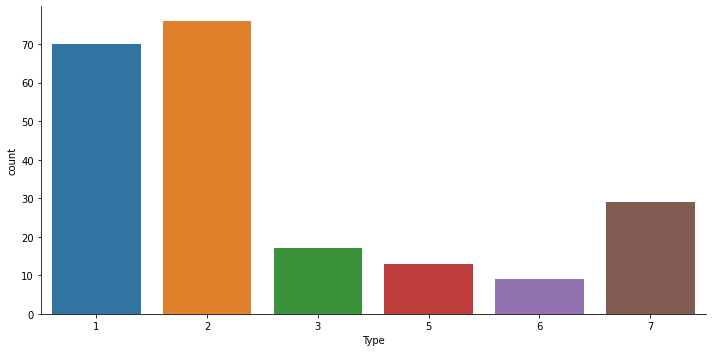

In [5]:
sns.catplot('Type',data=glass,height = 5,kind="count",aspect=2)

#### majority of the glass types are 1 = building_windows_float_processed and 2 = building_windows_non_float_processed, followed by 7 = headlamps.

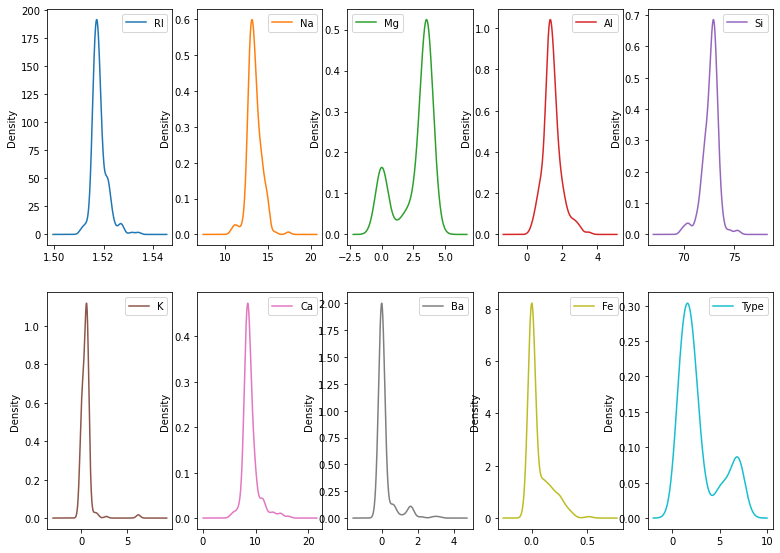

In [6]:
glass.plot(kind='density', subplots=True, layout=(4,5), figsize=(13,20),sharex=False)
plt.show()

# 4. Model Building

In [7]:
X = glass.drop(['Type'],axis=1)
y = glass['Type']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state= 12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((171, 9), (171,), (43, 9), (43,))

## Finding optimal number of K

In [9]:
# X =np.array(X)
# y =np.array(y)

In [10]:
k_values = list(range(1,25))
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

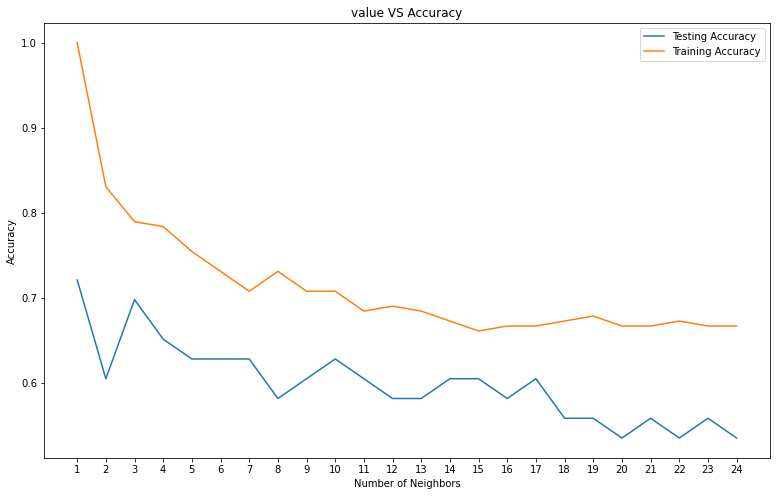

In [11]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

####  as we can see k =4 has most accurate result ,so we'll go with that 

# 5. KNN

### Generating a Model with K = 4

## Model Training without STANDARDIZATION

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6512


## Model Training with STANDARDIZATION

In [13]:
scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [14]:
pd.DataFrame(scaled_X)

,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [15]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state= 12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((171, 9), (171,), (43, 9), (43,))

In [16]:
X_train

array([[-1.20610400e-01,  3.70875159e-01,  8.65488567e-01, ...,
        -5.26095044e-01, -3.52876828e-01,  9.56587946e-01],
       [-1.70159374e+00, -5.00618371e-01, -1.86551055e+00, ...,
        -1.42761494e+00, -3.52876828e-01, -5.86450902e-01],
       [-1.73419864e-01, -4.02421917e-01,  5.59727851e-01, ...,
        -3.28887568e-01, -3.52876828e-01, -5.86450902e-01],
       ...,
       [ 1.24253390e+00,  9.84602997e-01,  7.89048388e-01, ...,
         4.31769840e-01, -3.52876828e-01, -5.86450902e-01],
       [-3.61553581e-01,  1.58605628e+00, -1.86551055e+00, ...,
        -4.90385747e-03,  9.77617652e-01, -5.86450902e-01],
       [ 4.25267336e+00, -3.28694275e+00, -1.86551055e+00, ...,
         3.05885515e+00,  5.99721046e+00,  2.29388828e+00]])

In [17]:
X_test

array([[ 4.77197670e-02, -2.55127236e-01,  6.57015352e-01,
        -7.52670580e-01,  2.31729707e-01,  1.12106515e-01,
        -3.85232561e-01, -1.71445763e-01,  1.16232646e+00],
       [-7.51023380e-01,  1.96656754e+00, -1.86551055e+00,
         2.13830494e+00,  5.16433114e-01, -6.87074327e-01,
        -8.94213472e-02,  7.15550557e-01, -5.86450902e-01],
       [ 1.23593271e+00,  9.60053883e-01,  7.61251959e-01,
        -1.07389008e+00, -1.67060670e+00, -4.10434805e-01,
         1.28915501e-01, -3.52876828e-01,  3.21971159e+00],
       [-5.45985699e-02, -9.67051528e-01,  5.24430284e-02,
        -1.23449983e+00,  1.49995398e+00, -2.26008457e-01,
         3.26122977e-01, -3.52876828e-01,  1.47093423e+00],
       [ 1.83044019e-01,  6.40112399e-02,  7.95997495e-01,
        -3.71222421e-01, -1.30620085e-01,  1.12106515e-01,
        -5.26095044e-01, -3.52876828e-01,  8.53718690e-01],
       [ 1.12371260e+00, -2.55127236e-01,  6.91760888e-01,
        -5.92060829e-01,  1.28201195e-01,  6.599992

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6977


## Model Accuracy score without standardization is :  0.6977

## Model Accuracy score with standardization is     :  0.6977